In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moment

In [2]:
N = 100
tetha = 3
np.random.seed(400)
X = np.random.randint(tetha, 2*tetha, N)
tetha_estimate = 2 / 3 * (np.sum(X) / N)
X


array([3, 5, 4, 3, 5, 4, 3, 5, 5, 5, 4, 5, 4, 4, 5, 4, 5, 3, 4, 5, 5, 3,
       3, 4, 4, 4, 3, 5, 5, 4, 4, 3, 3, 3, 4, 4, 3, 5, 3, 4, 4, 3, 5, 3,
       5, 3, 4, 3, 3, 4, 5, 3, 5, 3, 5, 5, 4, 4, 3, 3, 3, 4, 4, 3, 3, 4,
       5, 3, 5, 3, 5, 4, 5, 3, 5, 4, 5, 5, 3, 5, 3, 3, 3, 5, 5, 4, 3, 5,
       4, 5, 5, 4, 3, 5, 3, 5, 3, 5, 4, 3])

In [3]:
tetha_estimate

2.66

In [4]:
# Точный доверительный интервао
a = 0.05

left_border = np.max(X)/(1+(1 - a/2)**(1/N))
right_border = np.max(X)/(1+(a/2)**(1/N))

print('Точный интервал: [',left_border , ', ',right_border, ']')
print("Размах = ", right_border - left_border)

Точный интервал: [ 2.5003164725981133 ,  2.5461057649659415 ]
Размах =  0.04578929236782825


In [5]:
# Асимптотический доверительный интервал
XX = X ** 2

left_border1 = -1.96 * (2 / 3) / 10 * np.sqrt(0.01 * np.sum(XX) - (0.01 * np.sum(X)) ** 2) + tetha_estimate
right_border1 = 1.96 * (2 / 3) / 10 * np.sqrt(0.01 * np.sum(XX) - (0.01 * np.sum(X)) ** 2) + tetha_estimate

print('Асимптотический интервал: [',left_border1 , ', ',right_border1, ']')
print("Размах = ", right_border1 - left_border1)

Асимптотический интервал: [ 2.5499060635436974 ,  2.770093936456303 ]
Размах =  0.22018787291260544


In [6]:
# Бутстраповский доверительный интервал
M = np.array([])
for i in range(1000):
    M = np.append(M, 2/3*np.mean(np.random.choice(X, size = len(X))) - 2/3*np.mean(X))
M = np.sort(M)
left_border2 = 2/3*np.mean(X) + M[24]
right_border2 = 2/3*np.mean(X) + M[974]
print('Бутстраповский интервал: [',left_border2 , ', ',right_border2, ']')
print("Размах = ", right_border2 - left_border2)

Бутстраповский интервал: [ 2.5466666666666664 ,  2.7733333333333334 ]
Размах =  0.22666666666666702


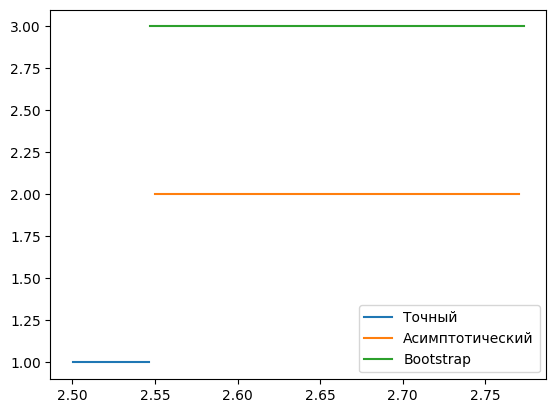

In [7]:
x1 = np.linspace(left_border, right_border, 100)
y1 = [1] * 100

x2 = np.linspace(left_border1, right_border1, 100)
y2 = [2] * 100

x3 = np.linspace(left_border2, right_border2, 100)
y3 = [3] * 100

plt.plot(x1, y1,)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.legend(['Точный', 'Асимптотический', 'Bootstrap'])

plt.show()